In [2]:
import os
from pathlib import Path

import librosa
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

import sys
sys.path.append('..')

%matplotlib inline

In [4]:
# Load the audio file
audio_path = Path('..', 'data', 'datasets', 'raw', 'audio', 'YTB-011.wav')
sr = 22050  # Sample rate
x, sr = librosa.load(audio_path, sr=sr)

print(f"Audio loaded: {audio_path}")
print(f"Sample rate: {sr} Hz")
print(f"Duration: {len(x) / sr:.2f} seconds")
print(f"Number of samples: {len(x)}")

Audio loaded: ../data/datasets/raw/audio/YTB-011.wav
Sample rate: 22050 Hz
Duration: 199.76 seconds
Number of samples: 4404708


In [5]:
# Compute STFT
n_fft = 2048
hop_length = 512

# Compute STFT (returns complex-valued matrix)
stft = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)

# Convert to magnitude spectrogram
magnitude = np.abs(stft)

# Convert to dB
magnitude_db = librosa.amplitude_to_db(magnitude, ref=np.max)

print(f"STFT shape: {stft.shape}")
print(f"Frequency bins: {stft.shape[0]}")
print(f"Time frames: {stft.shape[1]}")

STFT shape: (1025, 8603)
Frequency bins: 1025
Time frames: 8603


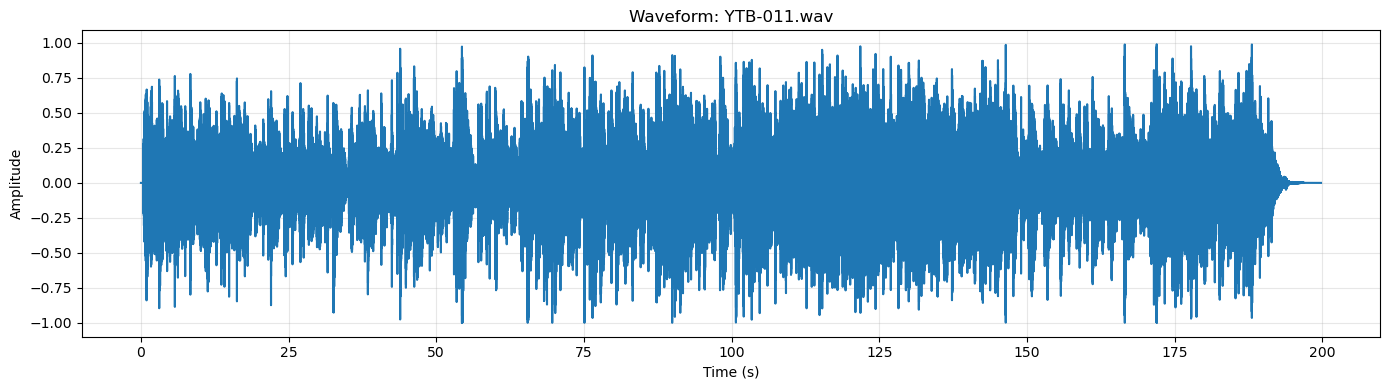

In [6]:
# Time-based waveform visualization
time_axis = np.arange(len(x)) / sr

plt.figure(figsize=(14, 4))
plt.plot(time_axis, x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform: YTB-011.wav')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

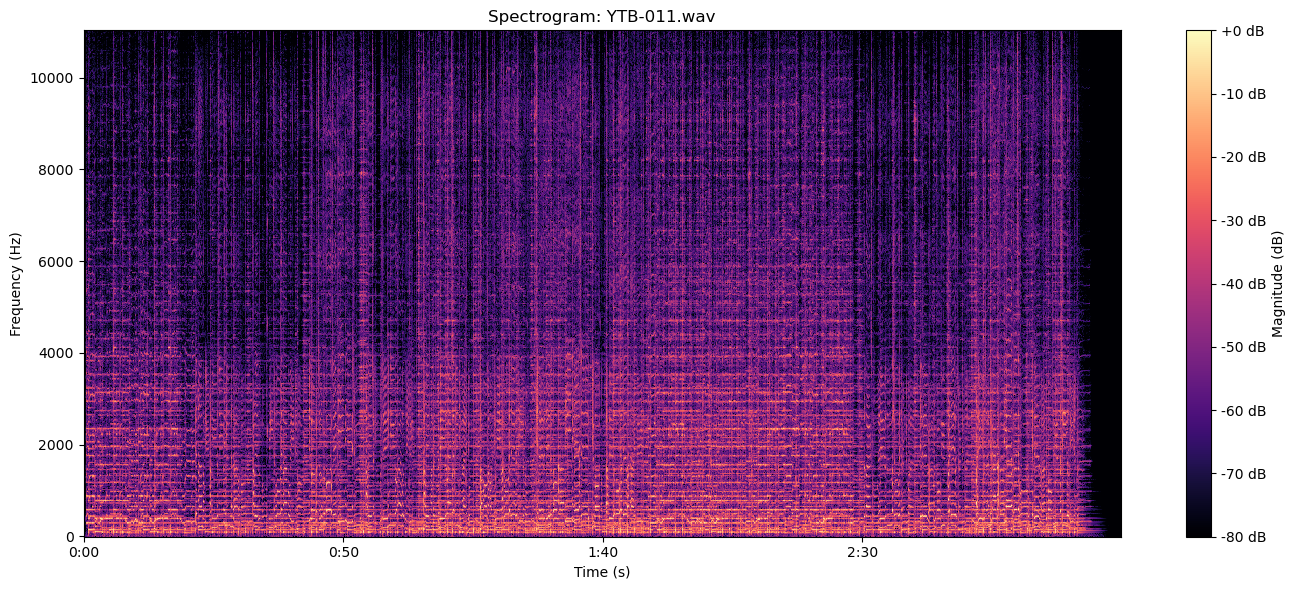

In [7]:
# Spectrogram visualization (frequency vs time)
# Get time axis for spectrogram
times = librosa.frames_to_time(np.arange(magnitude_db.shape[1]), sr=sr, hop_length=hop_length)
# Get frequency axis
frequencies = librosa.fft_frequencies(sr=sr, n_fft=n_fft)

plt.figure(figsize=(14, 6))
librosa.display.specshow(magnitude_db, x_axis='time', y_axis='hz', 
                         sr=sr, hop_length=hop_length, n_fft=n_fft)
plt.colorbar(format='%+2.0f dB', label='Magnitude (dB)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram: YTB-011.wav')
plt.tight_layout()
plt.show()

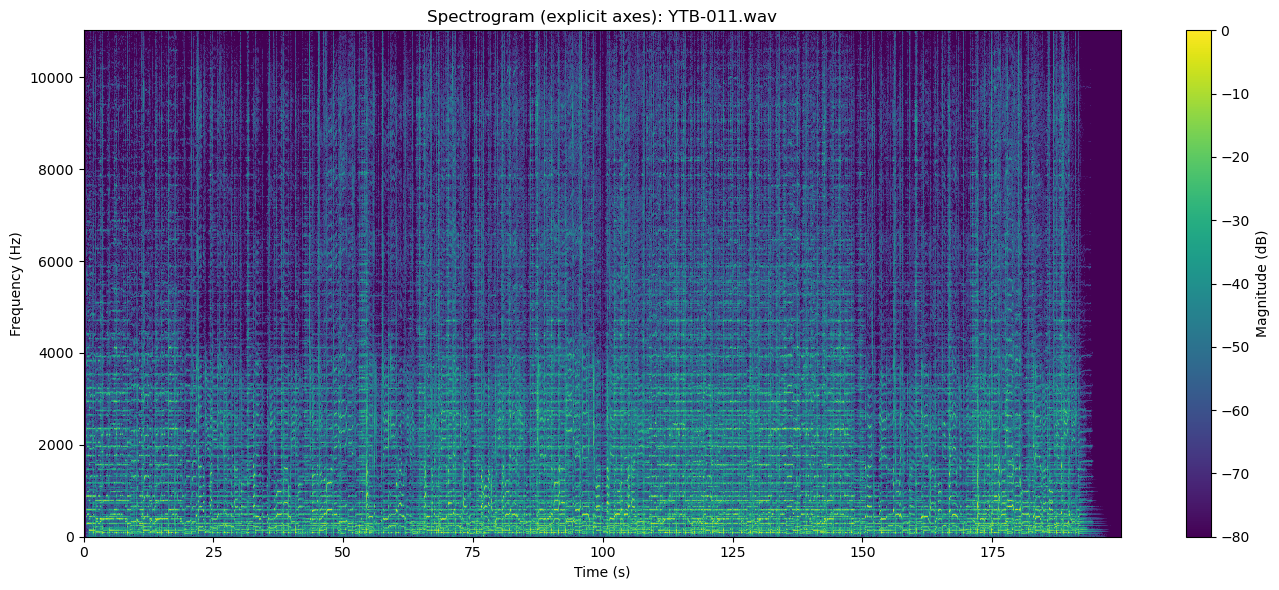

In [ ]:
# Alternative spectrogram view with explicit axes
plt.figure(figsize=(14, 6))
plt.imshow(magnitude_db, aspect='auto', origin='lower', 
           extent=[times[0], times[-1], frequencies[0], frequencies[-1]],
           cmap='viridis', interpolation='nearest')
plt.colorbar(label='Magnitude (dB)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram (explicit axes): YTB-011.wav')
plt.tight_layout()
plt.show()

In [10]:
# Compute Self-Similarity Matrix (SSM)
# Using chroma features for SSM computation
chroma = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length)


# Compute SSM: cosine similarity between all pairs of time frames
# Normalize chroma features
chroma_norm = chroma / (np.linalg.norm(chroma, axis=0, keepdims=True) + 1e-10)

# Compute SSM using dot product (cosine similarity for normalized vectors)
ssm = np.dot(chroma_norm.T, chroma_norm)

print(f"Chroma shape: {chroma.shape}")
print(f"SSM shape: {ssm.shape}")

Chroma shape: (12, 8603)
SSM shape: (8603, 8603)


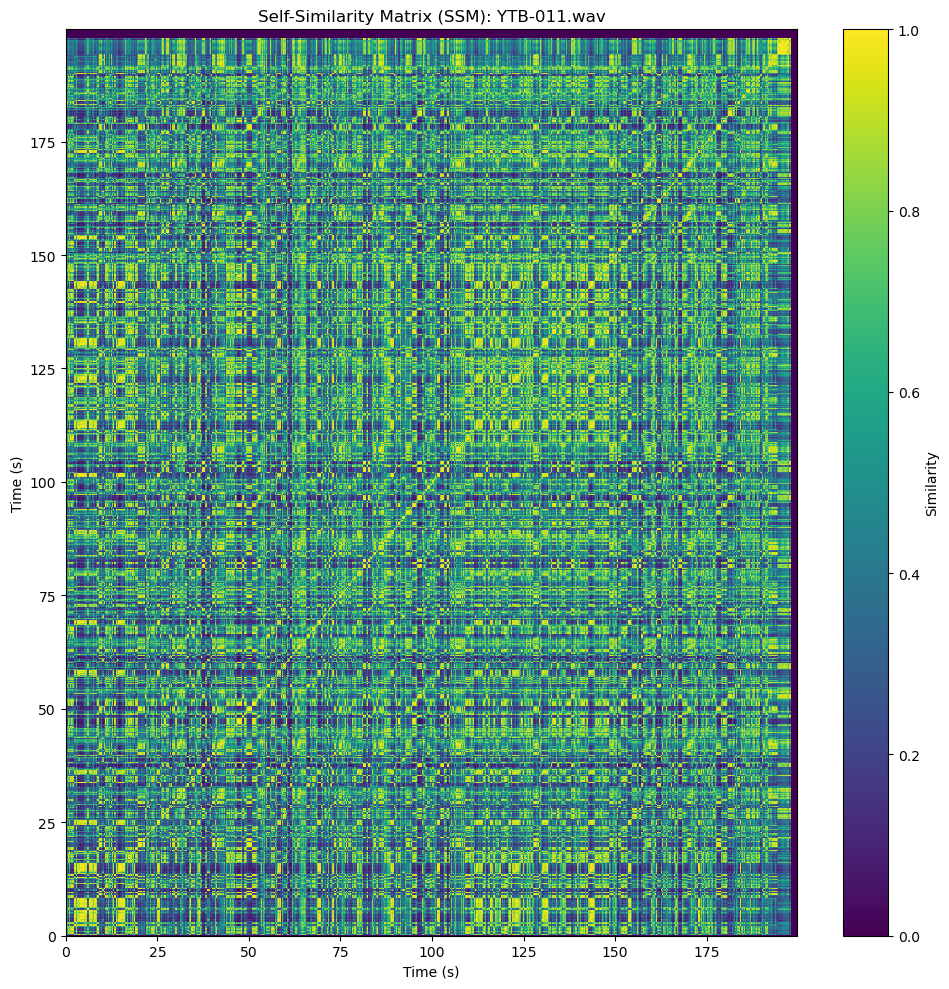

In [11]:
# Visualize Self-Similarity Matrix
# Get time axis for SSM
times_ssm = librosa.frames_to_time(np.arange(ssm.shape[0]), sr=sr, hop_length=hop_length)

plt.figure(figsize=(10, 10))
plt.imshow(ssm, aspect='auto', origin='lower', 
           extent=[times_ssm[0], times_ssm[-1], times_ssm[0], times_ssm[-1]],
           cmap='viridis', interpolation='nearest')
plt.colorbar(label='Similarity')
plt.xlabel('Time (s)')
plt.ylabel('Time (s)')
plt.title('Self-Similarity Matrix (SSM): YTB-011.wav')
plt.tight_layout()
plt.show()